In [14]:
import pandas as pd
data_path='../data/Transaction_Data.csv'

try:
    df=pd.read_csv(data_path, header=0)
    print(df.head(5))
except Exception as e:
    print(f"Error Loading CSV: {e}")

        Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0     March'25  40632468    2571551     7934167    56726423    565567.8   
1  February'25  40346611    2653977     7562366    43238584    408127.0   
2   January'25  40093882    2706098     7547244    42458039    393176.2   
3  December'24  39574049    2674512     7544985    44842543    407028.1   
4  November'24  39193282    2612063     7365236    41974856    365662.1   

   CCT_Number  CCT_Amount  PCT_Number  PCT_Amount  TIC_Number  TCT_Amount  
0     5946347     38028.3      941748      6236.3    63614518    609832.4  
1     6696521     31171.1      700809      4423.3    50635914    443721.4  
2     5411184     33968.4      761341      4825.3    48630564    431969.9  
3     5638006     35321.0      745972      4563.6    51226521    446912.7  
4     5219817     30996.2      704420      4281.6    47899093    400939.8  


In [15]:
print(df.head())

        Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0     March'25  40632468    2571551     7934167    56726423    565567.8   
1  February'25  40346611    2653977     7562366    43238584    408127.0   
2   January'25  40093882    2706098     7547244    42458039    393176.2   
3  December'24  39574049    2674512     7544985    44842543    407028.1   
4  November'24  39193282    2612063     7365236    41974856    365662.1   

   CCT_Number  CCT_Amount  PCT_Number  PCT_Amount  TIC_Number  TCT_Amount  
0     5946347     38028.3      941748      6236.3    63614518    609832.4  
1     6696521     31171.1      700809      4423.3    50635914    443721.4  
2     5411184     33968.4      761341      4825.3    48630564    431969.9  
3     5638006     35321.0      745972      4563.6    51226521    446912.7  
4     5219817     30996.2      704420      4281.6    47899093    400939.8  


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Period      76 non-null     object 
 1   IC_Debit    76 non-null     int64  
 2   IC_Credit   76 non-null     int64  
 3   IC_Prepaid  76 non-null     int64  
 4   DCT_Number  76 non-null     int64  
 5   DCT_Amount  76 non-null     float64
 6   CCT_Number  76 non-null     int64  
 7   CCT_Amount  76 non-null     float64
 8   PCT_Number  76 non-null     int64  
 9   PCT_Amount  76 non-null     float64
 10  TIC_Number  76 non-null     int64  
 11  TCT_Amount  76 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB
None


In [17]:
def parse_period(period):
    try:
        month=period.split("'")[0]
        year= period.split("'")[1]
        fullyear=int(f"20{year}")
        return pd.to_datetime(f"{month} 1 {fullyear}", format='%B %d %Y')
    except Exception as e:
        print(f"Warning:Could Not parse {period}. Error: {e}")
        return pd.NaT
df['Period']=df['Period'].apply(parse_period)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Period      76 non-null     datetime64[ns]
 1   IC_Debit    76 non-null     int64         
 2   IC_Credit   76 non-null     int64         
 3   IC_Prepaid  76 non-null     int64         
 4   DCT_Number  76 non-null     int64         
 5   DCT_Amount  76 non-null     float64       
 6   CCT_Number  76 non-null     int64         
 7   CCT_Amount  76 non-null     float64       
 8   PCT_Number  76 non-null     int64         
 9   PCT_Amount  76 non-null     float64       
 10  TIC_Number  76 non-null     int64         
 11  TCT_Amount  76 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.3 KB
None
      Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0 2025-03-01  40632468    2571551     7934167    56726423    565567.8   
1 202

In [18]:
df.dropna(subset=['Period'],inplace=True)


In [19]:
df.sort_values(by='Period',inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Period      76 non-null     datetime64[ns]
 1   IC_Debit    76 non-null     int64         
 2   IC_Credit   76 non-null     int64         
 3   IC_Prepaid  76 non-null     int64         
 4   DCT_Number  76 non-null     int64         
 5   DCT_Amount  76 non-null     float64       
 6   CCT_Number  76 non-null     int64         
 7   CCT_Amount  76 non-null     float64       
 8   PCT_Number  76 non-null     int64         
 9   PCT_Amount  76 non-null     float64       
 10  TIC_Number  76 non-null     int64         
 11  TCT_Amount  76 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.3 KB
None
      Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0 2018-12-01  15069435    1349842      243432    16692928    124488.8   
1 201

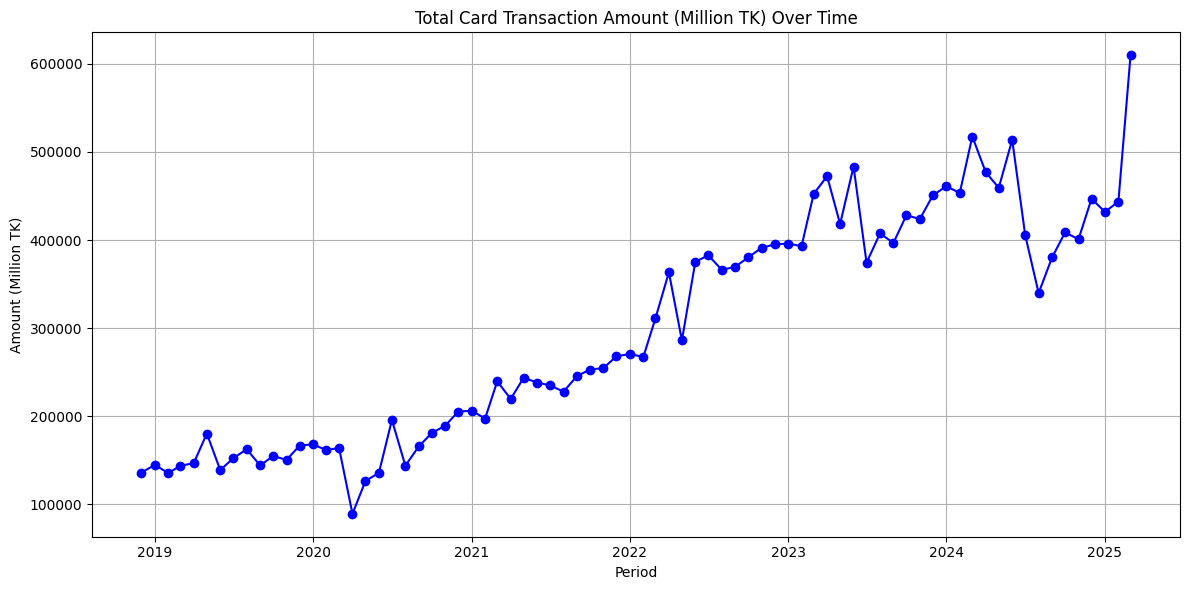

In [20]:
import matplotlib.pyplot as plt
import numpy as np
df_plot = df.set_index('Period')

plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['TCT_Amount'], marker='o', linestyle='-', color='b')
plt.title('Total Card Transaction Amount (Million TK) Over Time')
plt.xlabel('Period')
plt.ylabel('Amount (Million TK)')
plt.grid(True)
plt.tight_layout()
plt.show()

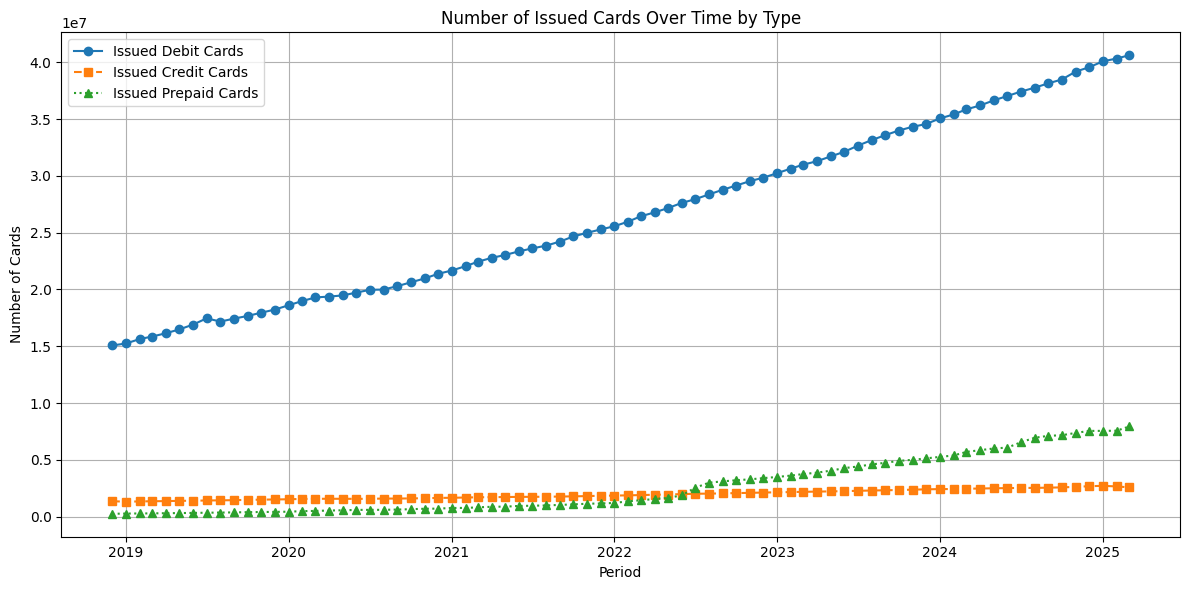

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['IC_Debit'], label='Issued Debit Cards', marker='o', linestyle='-')
plt.plot(df_plot.index, df_plot['IC_Credit'], label='Issued Credit Cards', marker='s', linestyle='--')
plt.plot(df_plot.index, df_plot['IC_Prepaid'], label='Issued Prepaid Cards', marker='^', linestyle=':')
plt.title('Number of Issued Cards Over Time by Type')
plt.xlabel('Period')
plt.ylabel('Number of Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

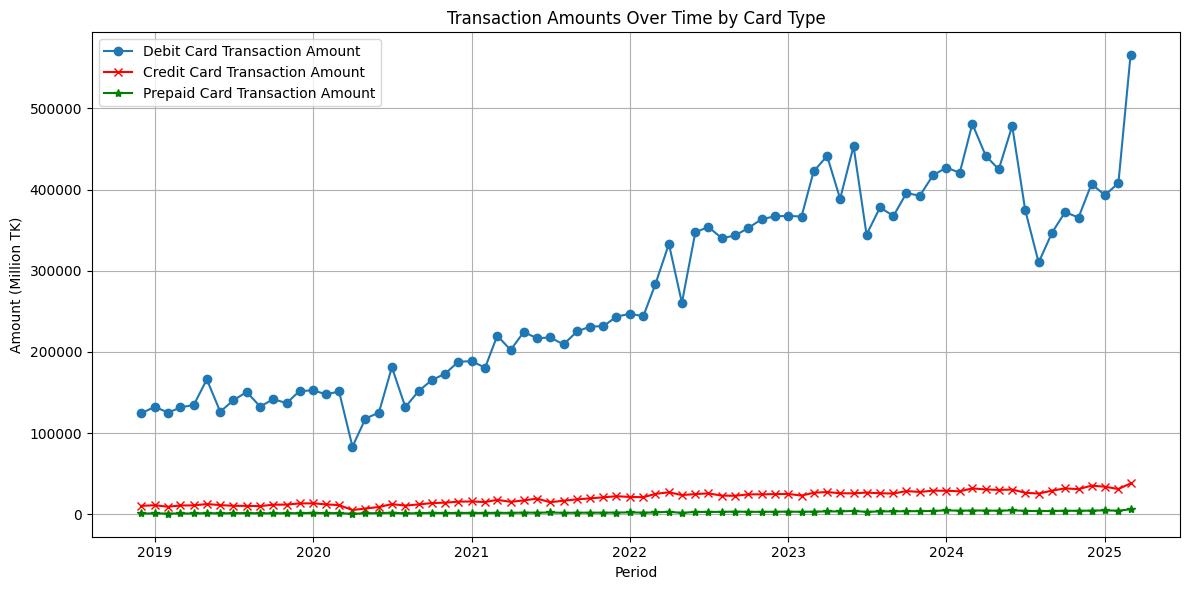

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['DCT_Amount'], label='Debit Card Transaction Amount', marker='o', linestyle='-')
plt.plot(df_plot.index, df_plot['CCT_Amount'], label='Credit Card Transaction Amount', marker='x', color='red',linestyle='-')
plt.plot(df_plot.index, df_plot['PCT_Amount'], label='Prepaid Card Transaction Amount', marker='*',color='g', linestyle='-')
plt.title('Transaction Amounts Over Time by Card Type')
plt.xlabel('Period')
plt.ylabel('Amount (Million TK)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

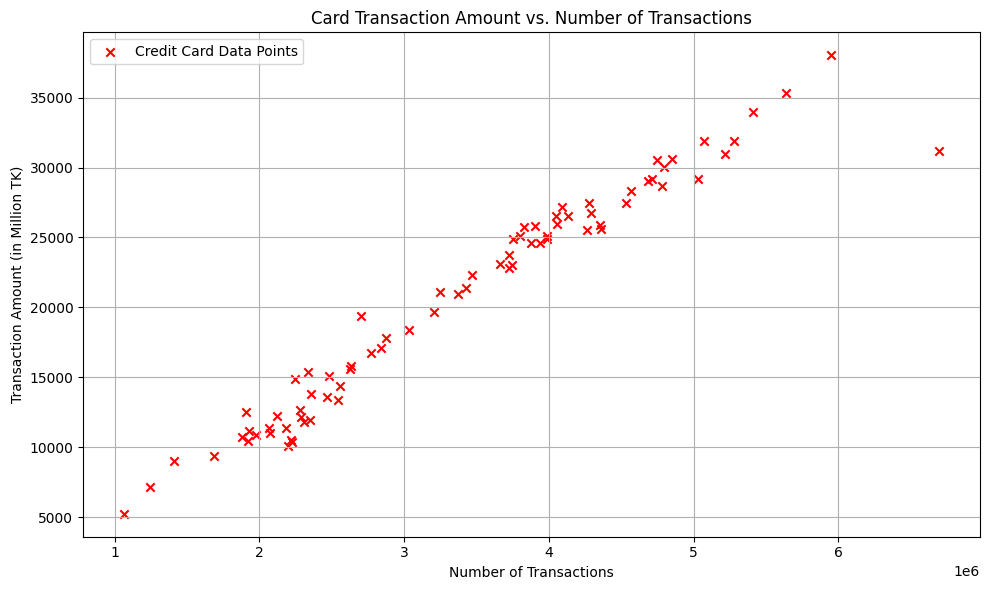

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CCT_Number'], df['CCT_Amount'], marker='x', c='r', label='Credit Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

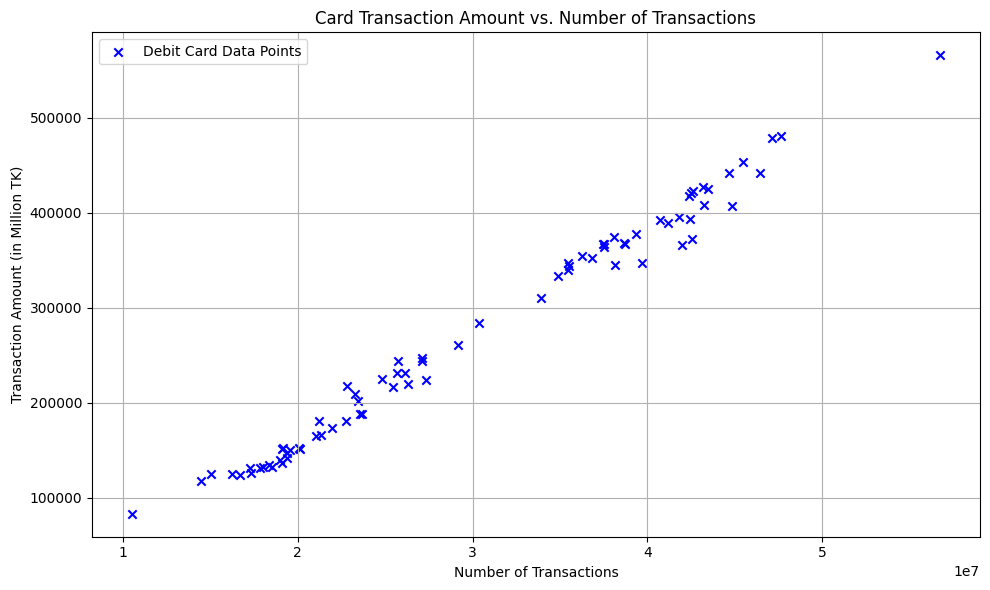

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DCT_Number'], df['DCT_Amount'], marker='x', c='b', label='Debit Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

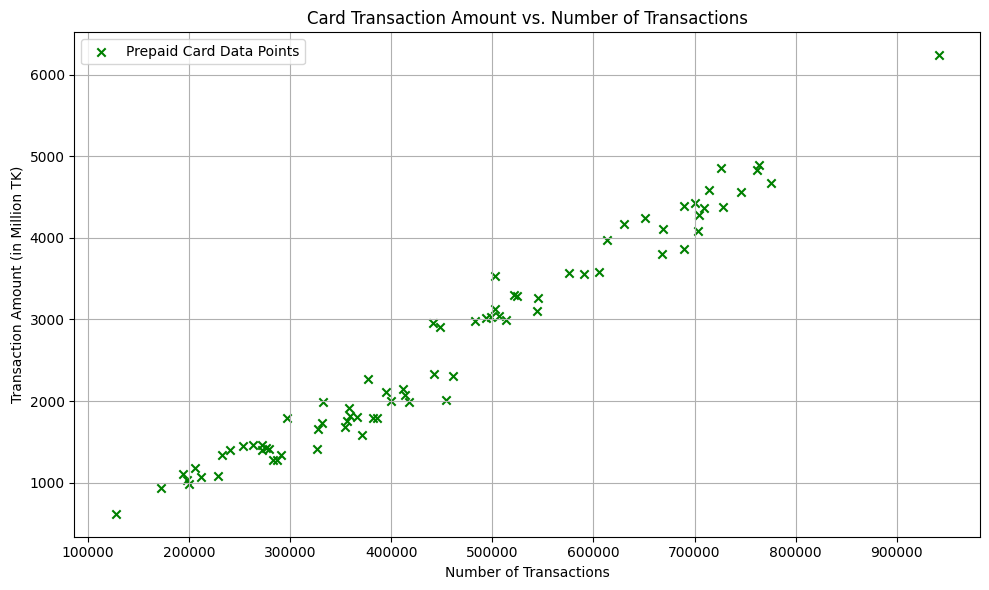

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['PCT_Number'], df['PCT_Amount'], marker='x', c='g', label='Prepaid Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

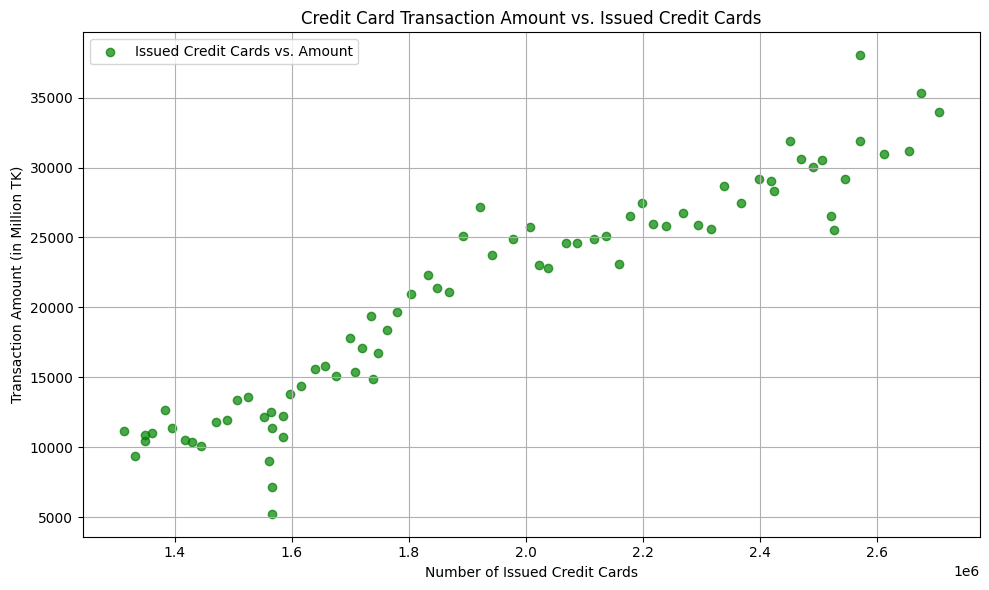

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IC_Credit'], df['CCT_Amount'], marker='o', c='g', alpha=0.7, label='Issued Credit Cards vs. Amount')
plt.title('Credit Card Transaction Amount vs. Issued Credit Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Credit Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

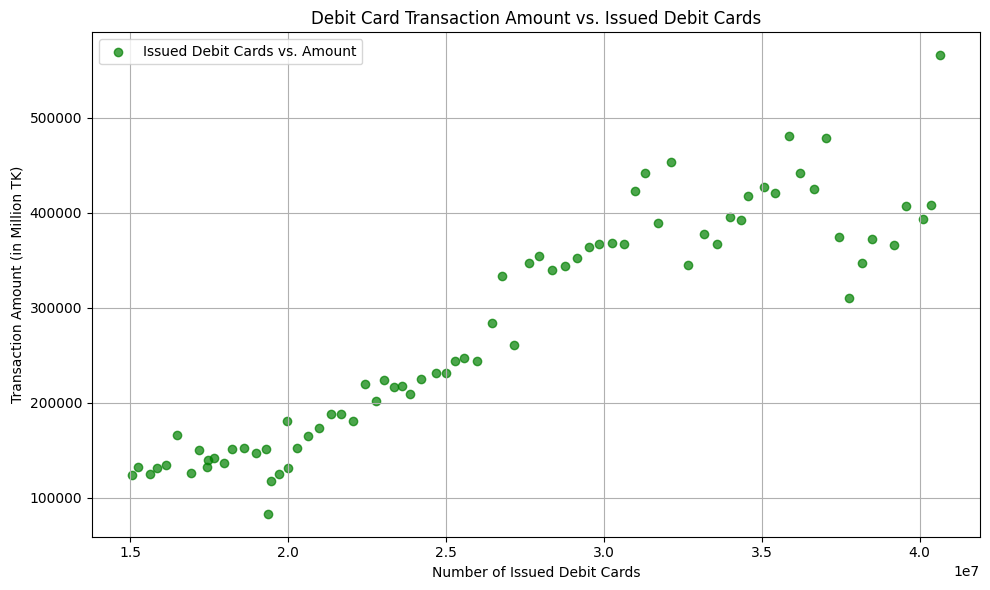

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IC_Debit'], df['DCT_Amount'], marker='o', c='g', alpha=0.7, label='Issued Debit Cards vs. Amount')
plt.title('Debit Card Transaction Amount vs. Issued Debit Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Debit Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

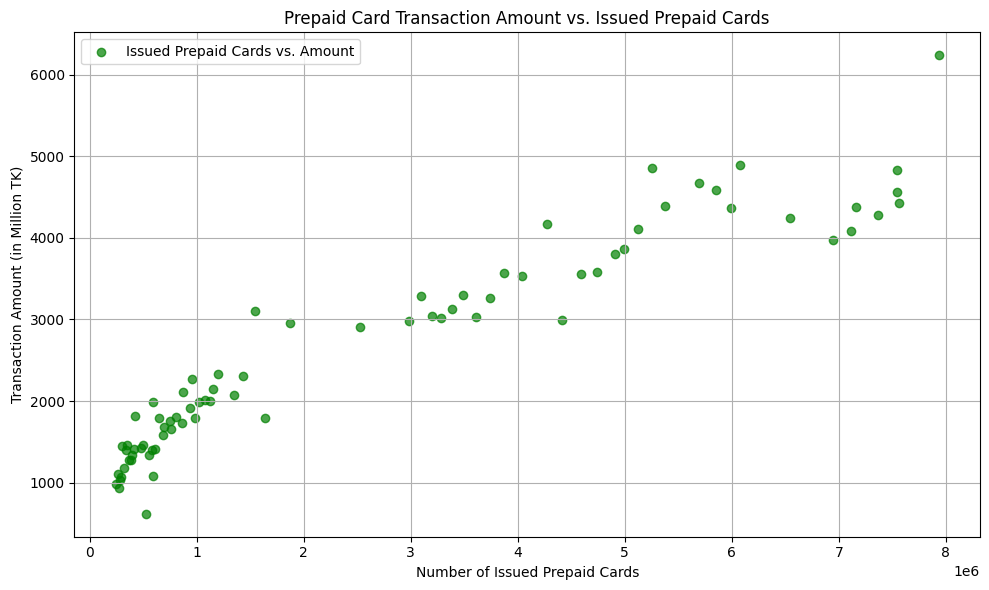

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IC_Prepaid'], df['PCT_Amount'], marker='o', c='g', alpha=0.7, label='Issued Prepaid Cards vs. Amount')
plt.title('Prepaid Card Transaction Amount vs. Issued Prepaid Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Prepaid Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
print(df.shape[0])

76


In [30]:
X_train = df[['DCT_Number', 'IC_Debit']].values
y_train =df['DCT_Amount'].values

In [31]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)


X Shape: (76, 2), X Type:<class 'numpy.ndarray'>)
[[16692928 15069435]
 [18032004 15244328]
 [16213676 15636374]
 [17813737 15858222]
 [18337142 16151290]
 [21349587 16487478]
 [17339564 16915478]
 [18968198 17459889]
 [19554608 17175101]
 [18519147 17440416]
 [19364443 17669974]
 [19066519 17961101]
 [20144404 18231093]
 [20054587 18611681]
 [19359073 18990843]
 [19113153 19300127]
 [10525050 19377791]
 [14483889 19476370]
 [15021035 19725783]
 [21194304 19972790]
 [17290129 19994649]
 [19167226 20295617]
 [21050317 20629271]
 [21937348 20969416]
 [23563580 21377291]
 [23645866 21670524]
 [22730161 22055754]
 [26328382 22449847]
 [23433399 22792079]
 [27339598 23041234]
 [25470741 23363702]
 [22791600 23620886]
 [23275096 23865558]
 [24814678 24225164]
 [25655022 24675363]
 [26156395 24999319]
 [27117021 25285859]
 [27109022 25574668]
 [25759397 25980681]
 [30394108 26447201]
 [34878785 26790235]
 [29186418 27169150]
 [35437558 27623986]
 [36241858 27950359]
 [35454401 28372594]
 [355

In [93]:
b =0
w = np.array([ 0, 0])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (2,), b_init type: <class 'int'>


In [42]:
def Predict(x,w,b):
    p=np.dot(w,x)+b
    return p

In [43]:
x_vec=X_train[0,:]
print(f"Shape={x_vec.shape},Value={x_vec}")

Shape=(2,),Value=[16692928 15069435]


In [44]:
f_wb=Predict(x_vec,w,b)
print(f"Shape={f_wb.shape},Value={f_wb}")


Shape=(),Value=174463997.5


In [71]:
def zscore_normalize_features(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    x_norm=(X-mu)/sigma
    return (x_norm,mu,sigma)


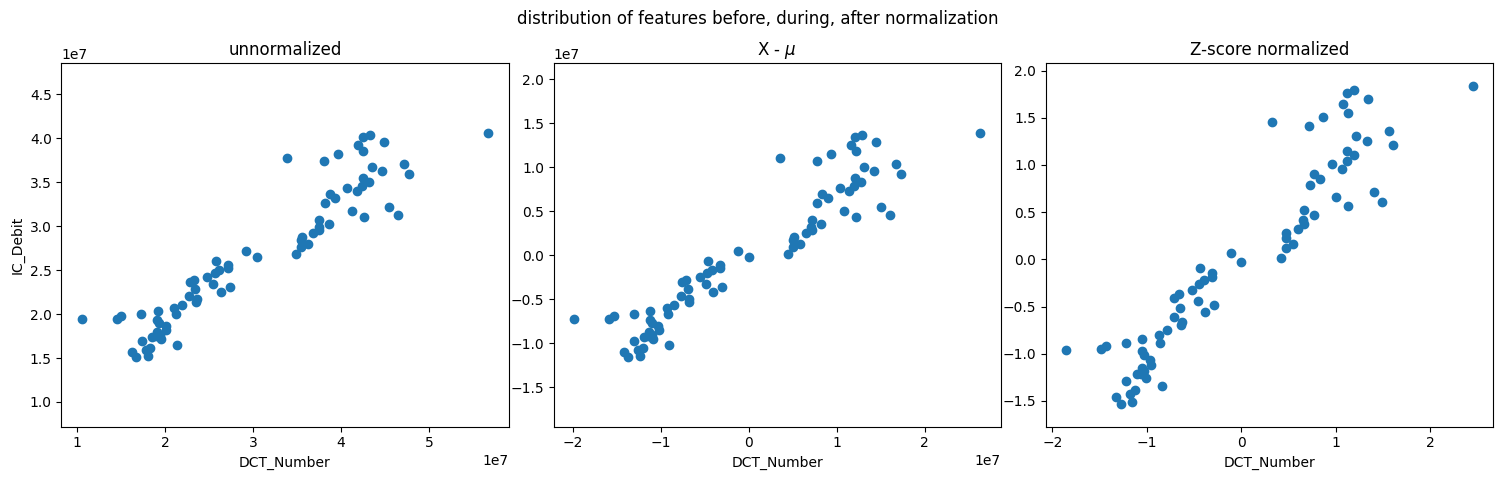

In [69]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma
X_features = ['DCT_Number', 'IC_Debit']

fig,ax=plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X_train[:,0], X_train[:,1])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[1]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,1])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[1]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,1])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[1]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [78]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [30393373.36842105 26692970.35526316], 
X_sigma = [10728571.61360654  7594433.37989219]
Peak to Peak range by column in Raw        X:[46201373 25563033]
Peak to Peak range by column in Normalized X:[4.30638622 3.36602242]


In [82]:
def Cost_compute(X,y,w,b):
    m=X.shape[0] #manually calculated 75% of the data
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost


In [94]:
y_mu = np.mean(y_train)
y_sigma = np.std(y_train)
y_norm = (y_train-y_mu)/y_sigma
cost=Cost_compute(X_norm,y_norm,w,b)
print(f"Cost={cost}")

Cost=0.4999999999999999


In [95]:
def Gradient_compute(X,y,w,b):
    m,n=X.shape
    Dj_dw=np.zeros((n,))
    Dj_db=0.
    for i in range(m):
        err=(np.dot(X[i],w)+b)-y[i]
        for j in range(n):
            Dj_dw[j]=Dj_dw[j]+err*X[i,j]
        Dj_db=Dj_db+err
    Dj_dw=Dj_dw/m
    Dj_db=Dj_db/m
    return Dj_dw,Dj_db


(76, 2)
